#Qiskit 36 -

*   4 server 7 vm
*   Riparto da Qiskit32
*   Rimetto try: INSTALLED
*   Dovrebbe essere quadratico quindi SUCCESS??
*   E' INFEASIBLE ma vad oavanti l ostesso, va solo più veloce perchè non deve calcolare??

##Beginning settings

In [101]:
try: INSTALLED
except NameError: INSTALLED = None

if INSTALLED!=1:
  !pip install Qiskit ipywidgets
  !pip install qiskit
  !pip install qiskit_optimization
  !pip install qiskit-optimization
  !pip install cplex
  !pip install ibm-quantum-widgets
  !pip install docplex
  INSTALLED=1

In [102]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

In [103]:
import time
from typing import List, Optional, Any
import numpy as np
import matplotlib.pyplot as plt

from docplex.mp.model import Model

from qiskit import BasicAer
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import CobylaOptimizer, MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.algorithms.admm_optimizer import ADMMParameters, ADMMOptimizer
from qiskit_optimization.translators import from_docplex_mp

from qiskit.utils.algorithm_globals import algorithm_globals
algorithm_globals.massive=True

# If CPLEX is installed, you can uncomment this line to import the CplexOptimizer.
# CPLEX can be used in this tutorial to solve the convex continuous problem,
# but also as a reference to solve the QUBO, or even the full problem.
#
# from qiskit.optimization.algorithms import CplexOptimizer

In [104]:
# define COBYLA optimizer to handle convex continuous problems.
cobyla = CobylaOptimizer()

# define QAOA via the minimum eigen optimizer
qaoa = MinimumEigenOptimizer(QAOA(quantum_instance=BasicAer.get_backend("statevector_simulator")))

# exact QUBO solver as classical benchmark
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())  # to solve QUBOs

# in case CPLEX is installed it can also be used for the convex problems, the QUBO,
# or as a benchmark for the full problem.
#
# cplex = CplexOptimizer()

##Problem definition

In [105]:
# construct model using docplex
mdl = Model("ex25")

#server = M = 4 = i = i0, i1, i2, i3
#virtual machine = N = 6 = j = j0, j1, j2, j3, j4, j5
#all servers have the same idle and dynamic power consumption
#all servers have the same maximum cpu capacity

si0 = mdl.binary_var(name="si0")
si1 = mdl.binary_var(name="si1")
si2 = mdl.binary_var(name="si2")
si3 = mdl.binary_var(name="si3")

vj0i0 = mdl.continuous_var(name="vj0i0")
vj1i0 = mdl.continuous_var(name="vj1i0")
vj2i0 = mdl.continuous_var(name="vj2i0")
vj3i0 = mdl.continuous_var(name="vj3i0")
vj4i0 = mdl.continuous_var(name="vj4i0")
vj5i0 = mdl.continuous_var(name="vj5i0")
vj6i0 = mdl.continuous_var(name="vj6i0")

vj0i1 = mdl.continuous_var(name="vj0i1")
vj1i1 = mdl.continuous_var(name="vj1i1")
vj2i1 = mdl.continuous_var(name="vj2i1")
vj3i1 = mdl.continuous_var(name="vj3i1")
vj4i1 = mdl.continuous_var(name="vj4i1")
vj5i1 = mdl.continuous_var(name="vj5i1")
vj6i1 = mdl.continuous_var(name="vj6i1")

vj0i2 = mdl.continuous_var(name="vj0i2")
vj1i2 = mdl.continuous_var(name="vj1i2")
vj2i2 = mdl.continuous_var(name="vj2i2")
vj3i2 = mdl.continuous_var(name="vj3i2")
vj4i2 = mdl.continuous_var(name="vj4i2")
vj5i2 = mdl.continuous_var(name="vj5i2")
vj6i2 = mdl.continuous_var(name="vj6i2")

vj0i3 = mdl.continuous_var(name="vj0i3")
vj1i3 = mdl.continuous_var(name="vj1i3")
vj2i3 = mdl.continuous_var(name="vj2i3")
vj3i3 = mdl.continuous_var(name="vj3i3")
vj4i3 = mdl.continuous_var(name="vj4i3")
vj5i3 = mdl.continuous_var(name="vj5i3")
vj6i3 = mdl.continuous_var(name="vj6i3")

pi = 10
pd = 5

ci0 = 100
ci1 = 130
ci2 = 100
ci3 = 70

uj0 = mdl.continuous_var(name="uj0")
uj1 = mdl.continuous_var(name="uj1")
uj2 = mdl.continuous_var(name="uj2")
uj3 = mdl.continuous_var(name="uj3")
uj4 = mdl.continuous_var(name="uj4")
uj5 = mdl.continuous_var(name="uj5")
uj6 = mdl.continuous_var(name="uj6")

sum0 = (vj0i0+vj1i0+vj2i0+vj3i0+vj4i0+vj5i0+vj6i0)
sum1 = (vj0i1+vj1i1+vj2i1+vj3i1+vj4i1+vj5i1+vj6i1)
sum2 = (vj0i2+vj1i2+vj2i2+vj3i2+vj4i2+vj5i2+vj6i2)
sum3 = (vj0i3+vj1i3+vj2i3+vj3i3+vj4i3+vj5i3+vj6i3)

mdl.minimize(pi*si0+pd*(sum0)+pi*si1+pd*uj1*(sum1)+pi*si2+pd*(sum2)+pi*si3+pd*(sum3))

mdl.add_constraint((vj0i0+vj1i0+vj2i0+vj3i0+vj4i0+vj5i0+vj6i0) >= ci0-5, "cons5")
mdl.add_constraint((vj0i1+vj1i1+vj2i1+vj3i1+vj4i1+vj5i1+vj6i1) >= ci1-5, "cons6")
mdl.add_constraint((vj0i2+vj1i2+vj2i2+vj3i2+vj4i2+vj5i2+vj6i2) >= ci2-5, "cons7")
mdl.add_constraint((vj0i3+vj1i3+vj2i3+vj3i3+vj4i3+vj5i3+vj6i3) >= ci3-5, "cons8")

mdl.add_constraint((vj0i0+vj1i0+vj2i0+vj3i0+vj4i0+vj5i0+vj6i0) <= ci0,"cons10")
mdl.add_constraint((vj0i1+vj1i1+vj2i1+vj3i1+vj4i1+vj5i1+vj6i1) <= ci1, "cons11")
mdl.add_constraint((vj0i2+vj1i2+vj2i2+vj3i2+vj4i2+vj5i2+vj6i2) <= ci2, "cons12")
mdl.add_constraint((vj0i3+vj1i3+vj2i3+vj3i3+vj4i3+vj5i3+vj6i3) <= ci3, "cons13")

mdl.add_constraint((si0) == 1, "cons14")
mdl.add_constraint((si1) == 1, "cons15")
mdl.add_constraint((si2) == 1, "cons16")
mdl.add_constraint((si3) == 1, "cons17")

#mdl.add_constraint((vj0i0+vj1i0+vj2i0+vj3i0+vj4i0+vj5i0) >= 0.9, "cons5")
#mdl.add_constraint((vj0i1+vj1i1+vj2i1+vj3i1+vj4i1+vj5i1) >= 0.9, "cons6")
#mdl.add_constraint((vj0i2+vj1i2+vj2i2+vj3i2+vj4i2+vj5i2) >= 0.9, "cons7")
#mdl.add_constraint((vj0i3+vj1i3+vj2i3+vj3i3+vj4i3+vj5i3) >= 0.9, "cons8")

#mdl.add_constraint((vj0i0+vj1i0+vj2i0+vj3i0+vj4i0+vj5i0) <= 0.99,"cons10")
#mdl.add_constraint((vj0i1+vj1i1+vj2i1+vj3i1+vj4i1+vj5i1) <= 0.99, "cons11")
#mdl.add_constraint((vj0i2+vj1i2+vj2i2+vj3i2+vj4i2+vj5i2) <= 0.99, "cons12")
#mdl.add_constraint((vj0i3+vj1i3+vj2i3+vj3i3+vj4i3+vj5i3) <= 0.99, "cons13")

docplex.mp.LinearConstraint[cons17](si3,EQ,1)

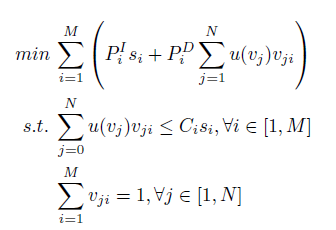

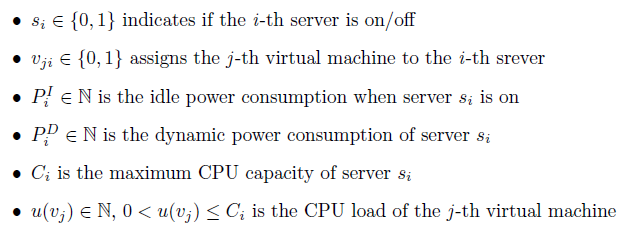

In [106]:
# load quadratic program from docplex model
qp = from_docplex_mp(mdl)
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: ex25

Minimize
 obj: 10 si0 + 10 si1 + 10 si2 + 10 si3 + 5 vj0i0 + 5 vj1i0 + 5 vj2i0 + 5 vj3i0
      + 5 vj4i0 + 5 vj5i0 + 5 vj6i0 + 5 vj0i2 + 5 vj1i2 + 5 vj2i2 + 5 vj3i2
      + 5 vj4i2 + 5 vj5i2 + 5 vj6i2 + 5 vj0i3 + 5 vj1i3 + 5 vj2i3 + 5 vj3i3
      + 5 vj4i3 + 5 vj5i3 + 5 vj6i3 + [ 10 vj0i1*uj1 + 10 vj1i1*uj1
      + 10 vj2i1*uj1 + 10 vj3i1*uj1 + 10 vj4i1*uj1 + 10 vj5i1*uj1 + 10 vj6i1*uj1
      ]/2
Subject To
 cons5: vj0i0 + vj1i0 + vj2i0 + vj3i0 + vj4i0 + vj5i0 + vj6i0 >= 95
 cons6: vj0i1 + vj1i1 + vj2i1 + vj3i1 + vj4i1 + vj5i1 + vj6i1 >= 125
 cons7: vj0i2 + vj1i2 + vj2i2 + vj3i2 + vj4i2 + vj5i2 + vj6i2 >= 95
 cons8: vj0i3 + vj1i3 + vj2i3 + vj3i3 + vj4i3 + vj5i3 + vj6i3 >= 65
 cons10: vj0i0 + vj1i0 + vj2i0 + vj3i0 + vj4i0 + vj5i0 + vj6i0 <= 100
 cons11: vj0i1 + vj1i1 + vj2i1 + vj3i1 + vj4i1 + vj5i1 + vj6i1 <= 130
 cons12: vj0i2 + vj1i2 + vj2i2 + vj3i2 + vj4i2 + vj5i2 + vj6i2 <= 100
 cons13: vj0i3 + vj1i

##Classical solution

In [107]:
admm_params = ADMMParameters(
                            rho_initial=1001,
                            beta=1000,
                            factor_c=900,
                            maxiter=100,
                            three_block=True, tol=1.e-6
                        )

In [108]:
# define QUBO optimizer
qubo_optimizer = exact
# qubo_optimizer = cplex  # uncomment to use CPLEX instead

# define classical optimizer
convex_optimizer = cobyla
# convex_optimizer = cplex  # uncomment to use CPLEX instead

# initialize ADMM with classical QUBO and convex optimizer
admm = ADMMOptimizer(params=admm_params,
                     qubo_optimizer=qubo_optimizer,
                     continuous_optimizer=convex_optimizer,
                    )

In [109]:
# run ADMM to solve problem
import time
t1 = time.perf_counter()

result = admm.solve(qp)

t2 = time.perf_counter()
print('time taken to run:',round(t2-t1),' seconds')
#%tb
#%timeit

time taken to run: 546  seconds


In [110]:
print(result.prettyprint())

objective function value: 1275.0
variable values: si0=0.0, si1=0.0, si2=0.0, si3=0.0, vj0i0=13.756802762519731, vj1i0=13.588592633956887, vj2i0=13.510847290555873, vj3i0=13.610842105285874, vj4i0=13.510887146022862, vj5i0=13.511079844877546, vj6i0=13.510948216781255, vj0i1=17.742793050558326, vj1i1=17.85923399097731, vj2i1=19.36278258862167, vj3i1=17.866198845072017, vj4i1=17.822672090385804, vj5i1=17.836516763884774, vj6i1=17.861760563907477, vj0i2=13.147368602805471, vj1i2=13.468226362143882, vj2i2=13.379767541193456, vj3i2=13.556242412438174, vj4i2=13.45627538832703, vj5i2=14.387856794825632, vj6i2=13.604262898266352, vj0i3=9.278514625121366, vj1i3=9.297872912476416, vj2i3=8.585179890406357, vj3i3=9.29939042103498, vj4i3=9.985655521260254, vj5i3=9.27714644060316, vj6i3=9.276240189097512, uj0=6.751295153162744e-20, uj1=1.3922443987046542e-20, uj2=5.407419121629134e-19, uj3=0.2766918708240135, uj4=0.27719692147156233, uj5=0.27774803314602026, uj6=-3.0356739967058645e-20
status: INFEAS

In [111]:
print(f"vj0i0=15.833203823269944, vj1i0=15.833356482350474, vj2i0=15.83351528067469, vj3i0=15.833346959064396, vj4i0=15.83327016528088, vj5i0=15.833307289359617, vj0i1=20.981811860339693, vj1i1=21.431644805734642, vj2i1=20.673826629800644, vj3i1=20.673750927740297, vj4i1=20.67375718520671, vj5i1=20.673815533046607, vj0i2=15.833337325309735, vj1i2=15.833368241568234, vj2i2=15.83329609545665, vj3i2=15.833280092698791, vj4i2=15.833284821567016, vj5i2=15.833433423399574, vj0i3=10.863487940977873, vj1i3=10.838852457227105, vj2i3=10.838880490927862, vj3i3=10.916712504795234, vj4i3=10.917150104637637, vj5i3=10.624916501434289, uj0=3.043120757378878e-07, uj1=1.4923742233541295e-22, uj2=0.9998022337171757, uj3=0.9998691327097831, uj4=9.282309221937615e-05, uj5=5.651087477267203e-22")

vj0i0=15.833203823269944, vj1i0=15.833356482350474, vj2i0=15.83351528067469, vj3i0=15.833346959064396, vj4i0=15.83327016528088, vj5i0=15.833307289359617, vj0i1=20.981811860339693, vj1i1=21.431644805734642, vj2i1=20.673826629800644, vj3i1=20.673750927740297, vj4i1=20.67375718520671, vj5i1=20.673815533046607, vj0i2=15.833337325309735, vj1i2=15.833368241568234, vj2i2=15.83329609545665, vj3i2=15.833280092698791, vj4i2=15.833284821567016, vj5i2=15.833433423399574, vj0i3=10.863487940977873, vj1i3=10.838852457227105, vj2i3=10.838880490927862, vj3i3=10.916712504795234, vj4i3=10.917150104637637, vj5i3=10.624916501434289, uj0=3.043120757378878e-07, uj1=1.4923742233541295e-22, uj2=0.9998022337171757, uj3=0.9998691327097831, uj4=9.282309221937615e-05, uj5=5.651087477267203e-22


In [112]:
vj0i0_sol=15.851064459774523
vj1i0_sol=15.827272575595426
vj2i0_sol=15.802048473821426
vj3i0_sol=15.881826491151267
vj4i0_sol=15.841980610395614
vj5i0_sol=15.79580738926177
vj0i1_sol=21.08861287998863
vj1i1_sol=21.434243730773943
vj2i1_sol=19.775964793974136
vj3i1_sol=20.95034113683539
vj4i1_sol=20.950366624473393
vj5i1_sol=20.95031391475139
vj0i2_sol=15.789007807064035
vj1i2_sol=15.810171054199753
vj2i2_sol=15.861449283482
vj3i2_sol=15.864077425804487
vj4i2_sol=15.853679812842373
vj5i2_sol=15.821614616607365
vj0i3_sol=10.774091149874998
vj1i3_sol=10.782283443638997
vj2i3_sol=10.896456791736515
vj3i3_sol=10.832111183649454
vj4i3_sol=10.832013158489675
vj5i3_sol=10.883044272610398
uj0_sol=4.4911487022574664e-05
uj1_sol=-3.814583132970386e-20
uj2_sol=1.0004668167010713
uj3_sol=1.0007522968304579
uj4_sol=1.0461087583507558
uj5_sol=7.313545483868541e-07

vi0_sol=vj0i0_sol+vj1i0_sol+vj2i0_sol+vj3i0_sol+vj4i0_sol+vj5i0_sol
vi1_sol=vj0i1_sol+vj1i1_sol+vj2i1_sol+vj3i1_sol+vj4i1_sol+vj5i1_sol
vi2_sol=vj0i2_sol+vj1i2_sol+vj2i2_sol+vj3i2_sol+vj4i2_sol+vj5i2_sol
vi3_sol=vj0i3_sol+vj1i3_sol+vj2i2_sol+vj3i3_sol+vj4i3_sol+vj5i3_sol

vj0_sol=vj0i0_sol+vj0i1_sol+vj0i2_sol+vj0i3_sol
vj1_sol=vj1i0_sol+vj1i1_sol+vj1i2_sol+vj1i3_sol
vj2_sol=vj2i0_sol+vj2i1_sol+vj2i2_sol+vj2i3_sol
vj3_sol=vj3i0_sol+vj3i1_sol+vj3i2_sol+vj3i3_sol
vj4_sol=vj4i0_sol+vj4i1_sol+vj4i2_sol+vj4i3_sol
vj5_sol=vj5i0_sol+vj5i1_sol+vj5i2_sol+vj5i3_sol

print("vi0_sol = ",vi0_sol,"\nvi1_sol = ",vi1_sol,"\nvi2_sol = ",vi2_sol,"\nvi3_sol = ",vi3_sol)
print("vitot = ",vi0_sol+vi0_sol+vi1_sol+vi2_sol)
print("vj0_sol = ",vj0_sol,"\nvj1_sol = ",vj1_sol,"\nvj2_sol = ",vj2_sol,"\nvj3_sol = ",vj3_sol,"\nvj4_sol = ",vj4_sol,"\nvj5_sol = ",vj5_sol)
print("vjtot = ",vj0_sol+vj1_sol+vj2_sol+vj3_sol+vj4_sol+vj5_sol)

vi0_sol =  95.00000000000003 
vi1_sol =  125.14984308079688 
vi2_sol =  95.00000000000001 
vi3_sol =  69.96499249174552
vitot =  410.1498430807969
vj0_sol =  63.50277629670219 
vj1_sol =  63.853970804208124 
vj2_sol =  62.33591934301407 
vj3_sol =  63.5283562374406 
vj4_sol =  63.47804020620105 
vj5_sol =  63.45078019323092
vjtot =  380.1498430807969


In [113]:
print("x={:}".format(result.x))
print("fval={:.7f}".format(result.fval))
print("x={:}".format(result.state.residuals))

x=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.37568028e+01  1.35885926e+01  1.35108473e+01  1.36108421e+01
  1.35108871e+01  1.35110798e+01  1.35109482e+01  1.77427931e+01
  1.78592340e+01  1.93627826e+01  1.78661988e+01  1.78226721e+01
  1.78365168e+01  1.78617606e+01  1.31473686e+01  1.34682264e+01
  1.33797675e+01  1.35562424e+01  1.34562754e+01  1.43878568e+01
  1.36042629e+01  9.27851463e+00  9.29787291e+00  8.58517989e+00
  9.29939042e+00  9.98565552e+00  9.27714644e+00  9.27624019e+00
  6.75129515e-20  1.39224440e-20  5.40741912e-19  2.76691871e-01
  2.77196921e-01  2.77748033e-01 -3.03567400e-20]
fval=1275.0000000
x=[0.0001, 9.999999999999401e-05, 8.080846228322798e-05, 3.506351779805883e-05, 0.00012414709119420392, 9.675213086780727e-05, 9.736461731641337e-05, 0.00014502343330922028, 0.0001062099045187571, 0.0001319943408420504, 0.00015302795841138346, 0.00013766956943429744, 0.00017556653325840084, 0.00020240738208280465, 0.0001388031943154382, 0.0001

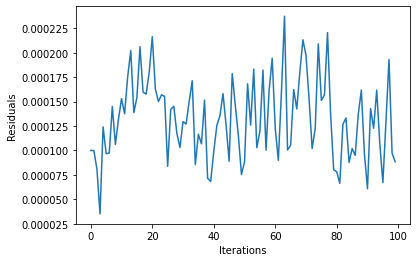

In [114]:
plt.plot(result.state.residuals)
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

In [115]:
lista = []
lista = result.state.residuals

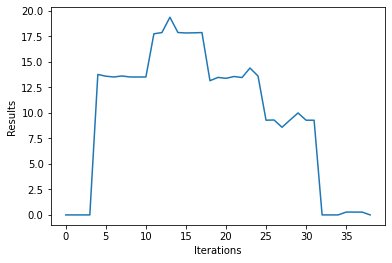

In [116]:
plt.plot(result.x)
plt.xlabel("Iterations")
plt.ylabel("Results")
plt.show()

In [117]:
#import matplotlib.pyplot as plt
#
#fig, ax = plt.subplots()
#
#f = [result.x]
#c = [40, 100, 30, 55]
#
#ax.bar(f, c,)
#
#ax.set_ylabel("Residuals")
#ax.set_title("Results")
#
#
#plt.show()

In [118]:
result

<ADMMOptimizationResult: fval=1275.0, si0=0.0, si1=0.0, si2=0.0, si3=0.0, vj0i0=13.756802762519731, vj1i0=13.588592633956887, vj2i0=13.510847290555873, vj3i0=13.610842105285874, vj4i0=13.510887146022862, vj5i0=13.511079844877546, vj6i0=13.510948216781255, vj0i1=17.742793050558326, vj1i1=17.85923399097731, vj2i1=19.36278258862167, vj3i1=17.866198845072017, vj4i1=17.822672090385804, vj5i1=17.836516763884774, vj6i1=17.861760563907477, vj0i2=13.147368602805471, vj1i2=13.468226362143882, vj2i2=13.379767541193456, vj3i2=13.556242412438174, vj4i2=13.45627538832703, vj5i2=14.387856794825632, vj6i2=13.604262898266352, vj0i3=9.278514625121366, vj1i3=9.297872912476416, vj2i3=8.585179890406357, vj3i3=9.29939042103498, vj4i3=9.985655521260254, vj5i3=9.27714644060316, vj6i3=9.276240189097512, uj0=6.751295153162744e-20, uj1=1.3922443987046542e-20, uj2=5.407419121629134e-19, uj3=0.2766918708240135, uj4=0.27719692147156233, uj5=0.27774803314602026, uj6=-3.0356739967058645e-20, status=INFEASIBLE>

<qiskit_optimization.algorithms.admm_optimizer.ADMMState at 0x7f139d9c9a10>

##Quantum solution

In [119]:
# define QUBO optimizer
qubo_optimizer = qaoa

# define classical optimizer
convex_optimizer = cobyla
# convex_optimizer = cplex  # uncomment to use CPLEX instead

# initialize ADMM with quantum QUBO optimizer and classical convex optimizer
admm_q = ADMMOptimizer(
    params=admm_params, qubo_optimizer=qubo_optimizer, continuous_optimizer=convex_optimizer
)

In [120]:
# run ADMM to solve problem
import time
t1 = time.perf_counter()

result_q = admm_q.solve(qp)

t2 = time.perf_counter()
print('time taken to run:',round(t2-t1),' seconds')
#%tb
#%timeit

time taken to run: 583  seconds


In [121]:
print(result_q.prettyprint())

objective function value: 1275.0
variable values: si0=0.0, si1=0.0, si2=0.0, si3=0.0, vj0i0=13.756802762519731, vj1i0=13.588592633956887, vj2i0=13.510847290555873, vj3i0=13.610842105285874, vj4i0=13.510887146022862, vj5i0=13.511079844877546, vj6i0=13.510948216781255, vj0i1=17.742793050558326, vj1i1=17.85923399097731, vj2i1=19.36278258862167, vj3i1=17.866198845072017, vj4i1=17.822672090385804, vj5i1=17.836516763884774, vj6i1=17.861760563907477, vj0i2=13.147368602805471, vj1i2=13.468226362143882, vj2i2=13.379767541193456, vj3i2=13.556242412438174, vj4i2=13.45627538832703, vj5i2=14.387856794825632, vj6i2=13.604262898266352, vj0i3=9.278514625121366, vj1i3=9.297872912476416, vj2i3=8.585179890406357, vj3i3=9.29939042103498, vj4i3=9.985655521260254, vj5i3=9.27714644060316, vj6i3=9.276240189097512, uj0=6.751295153162744e-20, uj1=1.3922443987046542e-20, uj2=5.407419121629134e-19, uj3=0.2766918708240135, uj4=0.27719692147156233, uj5=0.27774803314602026, uj6=-3.0356739967058645e-20
status: INFEAS

In [122]:
vj0i0_solq=15.833203823269944
vj1i0_solq=15.833356482350474
vj2i0_solq=15.83351528067469
vj3i0_solq=15.833346959064396
vj4i0_solq=15.83327016528088
vj5i0_solq=15.833307289359617
vj0i1_solq=20.981811860339693
vj1i1_solq=21.431644805734642
vj2i1_solq=20.673826629800644
vj3i1_solq=20.673750927740297
vj4i1_solq=20.67375718520671
vj5i1_solq=20.673815533046607
vj0i2_solq=15.833337325309735
vj1i2_solq=15.833368241568234
vj2i2_solq=15.83329609545665
vj3i2_solq=15.833280092698791
vj4i2_solq=15.833284821567016
vj5i2_solq=15.833433423399574
vj0i3_solq=10.863487940977873
vj1i3_solq=10.838852457227105
vj2i3_solq=10.838880490927862
vj3i3_solq=10.916712504795234
vj4i3_solq=10.917150104637637
vj5i3_solq=10.624916501434289

vi0_solq=vj0i0_solq+vj1i0_solq+vj2i0_solq+vj3i0_solq+vj4i0_solq+vj5i0_solq
vi1_solq=vj0i1_solq+vj1i1_solq+vj2i1_solq+vj3i1_solq+vj4i1_solq+vj5i1_solq
vi2_solq=vj0i2_solq+vj1i2_solq+vj2i2_solq+vj3i2_solq+vj4i2_solq+vj5i2_solq
vi3_solq=vj0i3_solq+vj1i3_solq+vj2i2_solq+vj3i3_solq+vj4i3_solq+vj5i3_solq

vj0_solq=vj0i0_solq+vj0i1_solq+vj0i2_solq+vj0i3_solq
vj1_solq=vj1i0_solq+vj1i1_solq+vj1i2_solq+vj1i3_solq
vj2_solq=vj2i0_solq+vj2i1_solq+vj2i2_solq+vj2i3_solq
vj3_solq=vj3i0_solq+vj3i1_solq+vj3i2_solq+vj3i3_solq
vj4_solq=vj4i0_solq+vj4i1_solq+vj4i2_solq+vj4i3_solq
vj5_solq=vj5i0_solq+vj5i1_solq+vj5i2_solq+vj5i3_solq

print("vi0_sol = ",vi0_solq,"\nvi1_sol = ",vi1_solq,"\nvi2_sol = ",vi2_solq,"\nvi3_sol = ",vi3_solq)
print("vitot = ",vi0_solq+vi0_solq+vi1_solq+vi2_solq)
print("vj0_sol = ",vj0_solq,"\nvj1_sol = ",vj1_solq,"\nvj2_sol = ",vj2_solq,"\nvj3_sol = ",vj3_solq,"\nvj4_sol = ",vj4_solq,"\nvj5_sol = ",vj5_solq)
print("vjtot = ",vj0_solq+vj1_solq+vj2_solq+vj3_solq+vj4_solq+vj5_solq)

vi0_sol =  95.0 
vi1_sol =  125.1086069418686 
vi2_sol =  95.0 
vi3_sol =  69.99441560452878
vitot =  410.10860694186863
vj0_sol =  63.51184094989725 
vj1_sol =  63.93722198688046 
vj2_sol =  63.17951849685984 
vj3_sol =  63.25709048429872 
vj4_sol =  63.257462276692245 
vj5_sol =  62.965472747240085
vjtot =  380.1086069418686


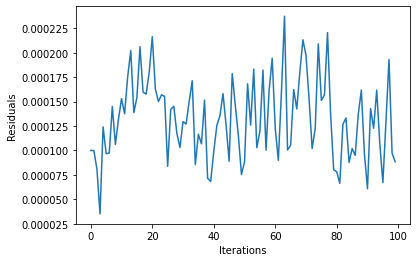

In [123]:
plt.clf()
plt.plot(result_q.state.residuals)
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

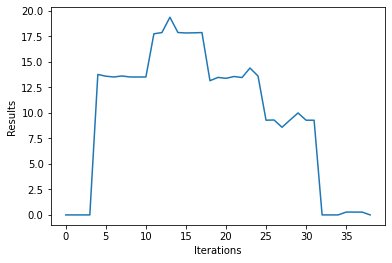

In [124]:
plt.plot(result_q.x)
plt.xlabel("Iterations")
plt.ylabel("Results")
plt.show()

In [125]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright